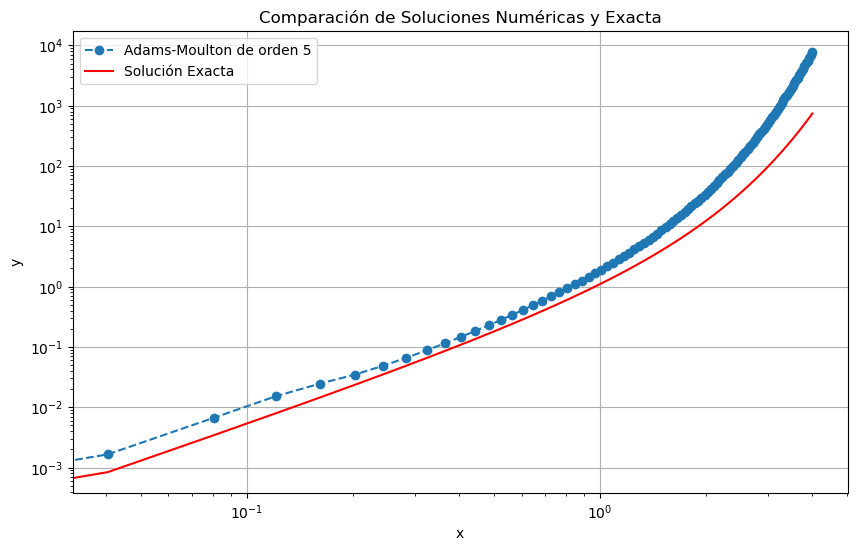

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def System(y,x):
    return x + 2*y

def RungeKutta4(f, y0, x):
    n = len(x)
    h = x[1] - x[0]
    y = np.zeros(n)
    y[0] = y0
    
    for i in range(n - 1):
        k1 = f(x[i], y[i])
        k2 = f(x[i] + 0.5*h, y[i] + 0.5*h*k1)
        k3 = f(x[i] + 0.5*h, y[i] + 0.5*h*k2)
        k4 = f(x[i] + h, y[i] + k3*h)
        y[i+1] = y[i] + (h/6.0)*(k1 + 2*k2 + 2*k3 + k4)
    
    return y


x = np.linspace(0., 4., 100)


y_rk4 = RungeKutta4(System, 0, x[:4])


def AdamsBashforth4(f, y0, x):
    n = len(x)
    h = x[1] - x[0]
    y = np.zeros(n)
    y[:4] = y0
    
    for i in range(3, n - 1):
        fn = f(x[i], y[i])
        fn1 = f(x[i-1], y[i-1])
        fn2 = f(x[i-2], y[i-2])
        fn3 = f(x[i-3], y[i-3])
        
        y[i+1] = y[i] + h*(1901/720*fn - 2774/720*fn1 + 2616/720*fn2 - 1274/720*fn3)
    
    return y

y_ab4 = AdamsBashforth4(System, y_rk4[:4], x)


def AdamsMoulton5(f, y0, x):
    n = len(x)
    h = x[1] - x[0]
    y = np.zeros(n)
    y[:4] = y0
    
    for i in range(3, n - 1):
        fn = f(y[i], x[i])
        fn1 = f(y[i-1], x[i-1])
        fn2 = f(y[i-2], x[i-2])
        fn3 = f(y[i-3], x[i-3])
        fn4 = f(y[i-4], x[i-4])
        
        y[i+1] = y[i] + h*(475/1440*fn + 1427/1440*fn1 + 482/1440*fn2 - 173/1440*fn3 + 27/1440*fn4)
    
    return y


y_am5 = AdamsMoulton5(System, y_ab4[:4], x)


def exact_solution(x):
    return -x/2 - (1 - np.exp(2*x))/4


plt.figure(figsize=(10, 6))
plt.plot(x, y_am5, label='Adams-Moulton de orden 5', linestyle='--', marker='o')
plt.plot(x, exact_solution(x), label='Solución Exacta', linestyle='-', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparación de Soluciones Numéricas y Exacta')
plt.legend()
plt.yscale('log')  
plt.xscale('log')
plt.grid(True)
plt.show()